<a href="https://colab.research.google.com/github/bayusiddik/FinalProject-Viskom/blob/main/HelmetDetection_1301194031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Computer Vision

**Membangun sistem deteksi ojek penggunaan helm.**

Nama : Muhammad Bayu Samudra Siddik

Nim  : 1301194031

---


 



## Import Library

#### Install OpenDataset Kaggle

In [63]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import Each Library

In [88]:
import os
import pprint
import opendatasets as od
import numpy as np
import pandas as pd
import tensorflow as tf
import fnmatch
import random

from PIL import Image
from IPython import display
from matplotlib import pyplot as plt
from tensorflow.python.util import compat
from tensorflow.core.protobuf import saved_model_pb2
from google.protobuf import text_format

from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import dataset_util, label_map_util
from object_detection.protos import string_int_label_map_pb2

## Prepare Dataset

In [106]:

!ls /content

base-models
detect-person-on-motorbike-or-scooter.zip
hardhat-and-safety-vest-image-for-object-detection.zip
labelmap.pbtxt
models
motorbike
pretrained-trt-engines-cocotacohardhatposenet.zip
sample_data
tensorrt5
tensorrt6
train


In [104]:
!mkdir -p /root/.kaggle/
!mv /content/kaggle.json /root/.kaggle/

In [105]:
!chmod 600 /root/.kaggle/kaggle.json

#### Download HardHat and Safety Vest Image for Object Detection Dataset

In [68]:
!kaggle d download johnsyin97/hardhat-and-safety-vest-image-for-object-detection

hardhat-and-safety-vest-image-for-object-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
!unzip hardhat-and-safety-vest-image-for-object-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/neg_716.jpg       
  inflating: train/neg_716.txt       
  inflating: train/neg_717.jpg       
  inflating: train/neg_717.txt       
  inflating: train/neg_718.jpg       
  inflating: train/neg_718.txt       
  inflating: train/neg_719.jpg       
  inflating: train/neg_719.txt       
  inflating: train/neg_72.jpg        
  inflating: train/neg_72.txt        
  inflating: train/neg_720.jpg       
  inflating: train/neg_720.txt       
  inflating: train/neg_721.jpg       
  inflating: train/neg_721.txt       
  inflating: train/neg_722.jpg       
  inflating: train/neg_722.txt       
  inflating: train/neg_723.jpg       
  inflating: train/neg_723.txt       
  inflating: train/neg_724.jpg       
  inflating: train/neg_724.txt       
  inflating: train/neg_725.jpg       
  inflating: train/neg_725.txt       
  inflating: train/neg_726.jpg       
  inflating: train/neg_726.txt       
  inflating: train/neg_727.jpg       

#### Download Pretrained SSD MobileNet COCO/TACO/Hardhat/PoseNet Dataset

In [70]:
!kaggle d download bouweceunen/pretrained-trt-engines-cocotacohardhatposenet

pretrained-trt-engines-cocotacohardhatposenet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
!unzip pretrained-trt-engines-cocotacohardhatposenet.zip

Archive:  pretrained-trt-engines-cocotacohardhatposenet.zip
replace base-models/resnet10_fd_lpd.caffemodel? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: base-models/resnet10_fd_lpd.caffemodel  
  inflating: base-models/resnet10_fd_lpd.prototxt  
  inflating: base-models/resnet18_posenet.pth  
  inflating: base-models/ssd_mobilenet_v2_coco_2018_03_29.pb  
  inflating: base-models/ssd_mobilenet_v2_hardhat_2018_03_29.pb  
  inflating: tensorrt5/resnet10_fd_lpd.engine  
  inflating: tensorrt5/ssd_mobilenet_v2_coco_2018_03_29.engine  
  inflating: tensorrt5/ssd_mobilenet_v2_coco_2018_03_29.uff  
  inflating: tensorrt5/ssd_mobilenet_v2_hardhat_2018_03_29.uff  
  inflating: tensorrt5/ssd_mobilenet_v2_taco_2018_03_29.engine  
  inflating: tensorrt5/ssd_mobilenet_v2_taco_2018_03_29.uff  
  inflating: tensorrt6/resnet10_fd_lpd.engine  
  inflating: tensorrt6/resnet18_posenet.engine  
  inflating: tensorrt6/resnet18_posenet.onnx  
  inflating: tensorrt6/ssd_mobilenet_v2_coco_2018_03_29.en

#### Download Detect Person on motorbike or scooter Dataset

In [72]:
!kaggle d download savanagrawal/detect-person-on-motorbike-or-scooter

detect-person-on-motorbike-or-scooter.zip: Skipping, found more recently modified local copy (use --force to force download)


In [73]:
!mkdir ./motorbike
!unzip detect-person-on-motorbike-or-scooter.zip -d ./motorbike

mkdir: cannot create directory ‘./motorbike’: File exists
Archive:  detect-person-on-motorbike-or-scooter.zip
replace ./motorbike/chart.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: ./motorbike/chart.png   
replace ./motorbike/coco.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./motorbike/coco.names  
  inflating: ./motorbike/dataset/obj/1 (1).jpg  
  inflating: ./motorbike/dataset/obj/1 (1).txt  
  inflating: ./motorbike/dataset/obj/1 (1)__flip.jpg  
  inflating: ./motorbike/dataset/obj/1 (1)__flip.txt  
  inflating: ./motorbike/dataset/obj/1.jpg  
  inflating: ./motorbike/dataset/obj/1.txt  
  inflating: ./motorbike/dataset/obj/10.jpg  
  inflating: ./motorbike/dataset/obj/10.txt  
  inflating: ./motorbike/dataset/obj/100.jpg  
  inflating: ./motorbike/dataset/obj/100.txt  
  inflating: ./motorbike/dataset/obj/100__flip.jpg  
  inflating: ./motorbike/dataset/obj/100__flip.txt  
  inflating: ./motorbike/dataset/obj/101.jpg  
  inflating: ./motorbike/dataset/o

#### Clonde Tensoflow Model

In [74]:
! rm -rf ./models && git clone https://github.com/tensorflow/models.git \
    && cd models/research \
    && protoc object_detection/protos/*.proto --python_out=. \
    && cp object_detection/packages/tf2/setup.py . && \
    python3 -m pip install --use-feature=2020-resolver .

Cloning into 'models'...
remote: Enumerating objects: 80048, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 80048 (delta 112), reused 199 (delta 95), pack-reused 79814
Receiving objects: 100% (80048/80048), 594.47 MiB | 28.99 MiB/s, done.
Resolving deltas: 100% (56948/56948), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696474 sha256=03e7f795f

## Def Function

#### Def Reconstruc Frozen Graph

In [75]:
def reconstruct(pb_path):
    if not os.path.isfile(pb_path):
        print("Error: %s not found" % pb_path)

    print("Reconstructing Tensorflow model")
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.compat.v1.GraphDef()
        with tf.io.gfile.GFile(pb_path, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    print("Success!")
    return detection_graph

#### Visualize Detection

In [76]:
def image2np(image):
    (w, h) = image.size
    return np.array(image.getdata()).reshape((h, w, 3)).astype(np.uint8)

def image2tensor(image):
    npim = image2np(image)
    return np.expand_dims(npim, axis=0)

%matplotlib inline
def detect(detection_graph, test_image_path):
    with detection_graph.as_default():
        gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.01)
        with tf.compat.v1.Session(graph=detection_graph,config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)) as sess:
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            image = Image.open(test_image_path)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image2tensor(image)}
            )

            npim = image2np(image)
            vis_util.visualize_boxes_and_labels_on_image_array(
                npim,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=5)
            plt.figure(figsize=(12, 8))
            plt.imshow(npim)
            plt.show()

## Create Label Map

In [77]:
categories = ["helmet", "none"]
NCLASSES = 2

In [78]:
print('Building label map from examples')

labelmap = string_int_label_map_pb2.StringIntLabelMap()
for idx,category in enumerate(categories):
    item = labelmap.item.add()
    # label map id 0 is reserved for the background label
    item.id = idx+1
    item.name = category

with open('./labelmap.pbtxt', 'w') as f:
    f.write(text_format.MessageToString(labelmap))

print('Label map witten to labelmap.pbtxt')

with open('./labelmap.pbtxt') as f:
    pprint.pprint(f.readlines())
     

Building label map from examples
Label map witten to labelmap.pbtxt
['item {\n',
 '  name: "helmet"\n',
 '  id: 1\n',
 '}\n',
 'item {\n',
 '  name: "none"\n',
 '  id: 2\n',
 '}\n']


In [79]:
label_map = label_map_util.load_labelmap('labelmap.pbtxt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NCLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Reconstruct Frozen Graph

In [80]:
detection_graph = reconstruct("/content/base-models/ssd_mobilenet_v2_hardhat_2018_03_29.pb")

Reconstructing Tensorflow model
Success!


## Validate Images

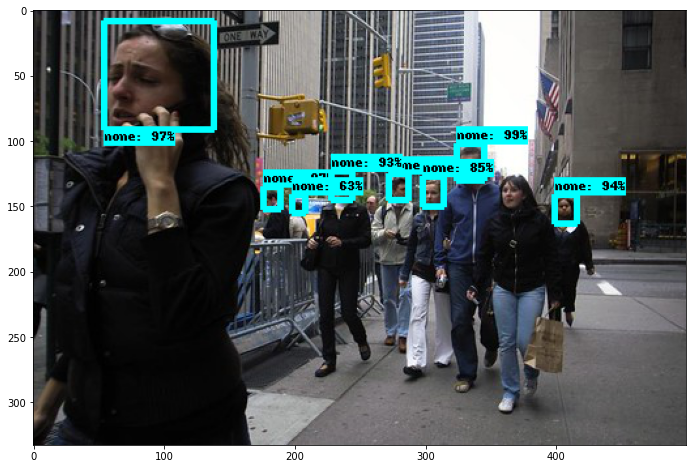

In [81]:
detect(detection_graph, '/content/train/neg_100.jpg')

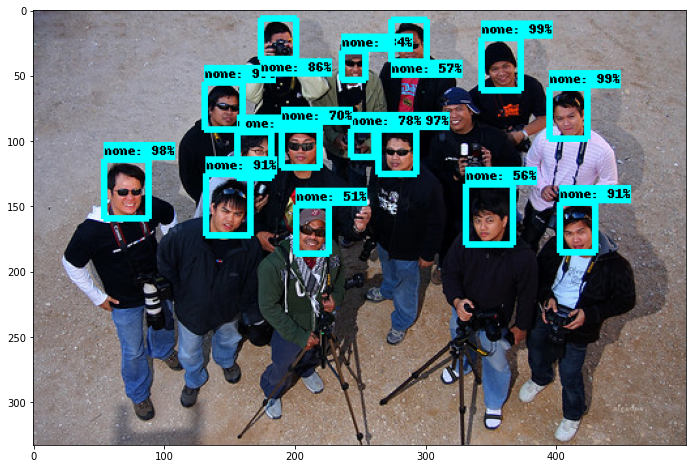

In [82]:
detect(detection_graph, '/content/train/neg_1099.jpg')

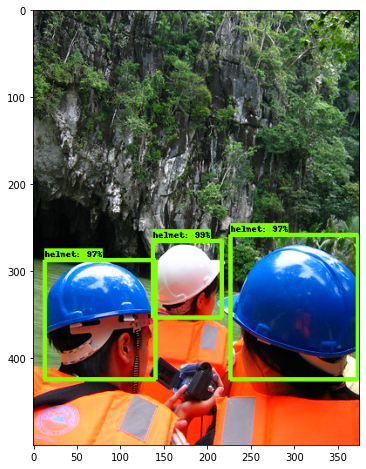

In [83]:
detect(detection_graph, '/content/train/pos_942.jpg')

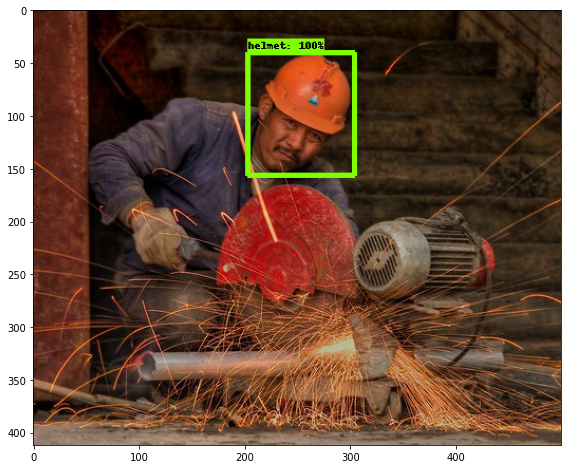

In [84]:
detect(detection_graph, '/content/train/pos_970.jpg')

## Experiment Spesific Image

In [85]:
path = r'./motorbike/dataset/obj/'
for dimage in fnmatch.filter(os.listdir(path),"*.jpg"):
  # set the base width of the result
  basewidth = 300
  img = Image.open(path+dimage)
  # determining the height ratio
  wpercent = (basewidth/float(img.size[0]))
  hsize = int((float(img.size[1])*float(wpercent)))
  # resize image and save
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)
  img = img.convert('RGB')
  img.save(path+dimage) 
  pass
print(path,dimage)


./motorbike/dataset/obj/ 113__flip.jpg


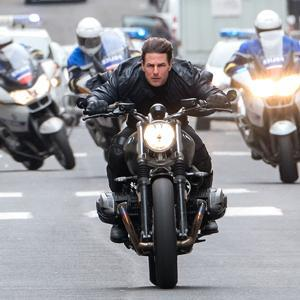

In [86]:
# from IPython.display import Image
# Image('/content/motorbike/dataset/obj/113__flip.jpg')
display.Image("/content/motorbike/dataset/obj/113__flip.jpg")

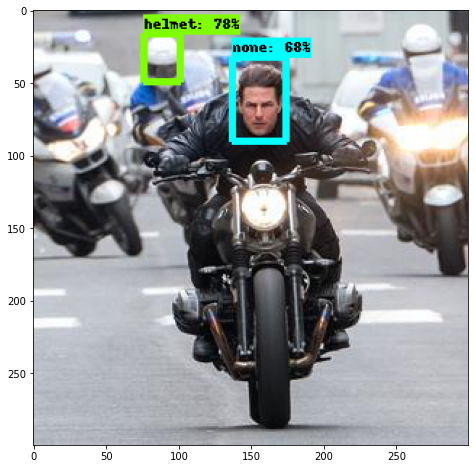

In [87]:
detect(detection_graph, f'./motorbike/dataset/obj/113__flip.jpg')

#### Experiment Random Image

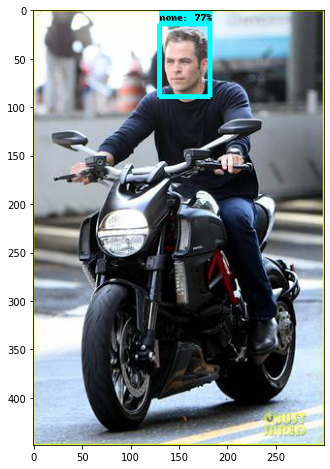

In [95]:
detect(detection_graph, f'./motorbike/dataset/obj/{random.randint(1,100)}.jpg')

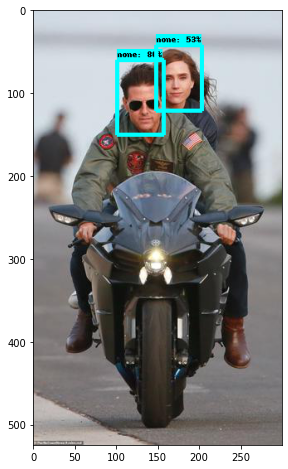

In [100]:
detect(detection_graph, f'./motorbike/dataset/obj/{random.randint(1,100)}.jpg')

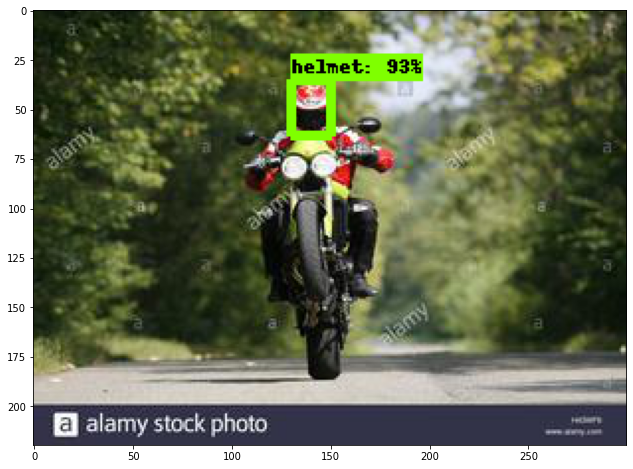

In [103]:
detect(detection_graph, f'./motorbike/dataset/obj/{random.randint(1,100)}.jpg')